In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error


In [2]:

df = pd.read_csv(r"C:\Users\Maftuna\Desktop\adult.csv")


In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip()


In [6]:
df.columns

Index(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married',
       'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40',
       'United-States', '<=50K'],
      dtype='object')

In [7]:
df['State-gov'].unique()


array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
cat_columns = df.select_dtypes(include=['object', 'category']).columns
print(cat_columns)

Index(['State-gov', 'Bachelors', 'Never-married', 'Adm-clerical',
       'Not-in-family', 'White', 'Male', 'United-States', '<=50K'],
      dtype='object')


In [9]:
col_names = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-Num',
              'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
              'Capital-Gain', 'Capital-Loss', 'Hours-per-week', 'Native-Country', 'Income']
df.columns = col_names

df.columns


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-Num',
       'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-Gain', 'Capital-Loss', 'Hours-per-week', 'Native-Country',
       'Income'],
      dtype='object')

In [10]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
def show_unique_object_values(df):
    print("📌 Har bir *object* ustundagi noyob qiymatlar:")
    for col in df.select_dtypes(include='object').columns:
        unique_vals = df[col].unique()
        print(f"\n🟨 {col} ({len(unique_vals)} ta noyob qiymat):")
        print(unique_vals)



In [12]:
show_unique_object_values(df)


📌 Har bir *object* ustundagi noyob qiymatlar:

🟨 Workclass (9 ta noyob qiymat):
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

🟨 Education (16 ta noyob qiymat):
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

🟨 Marital-Status (7 ta noyob qiymat):
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']

🟨 Occupation (15 ta noyob qiymat):
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']

🟨 Relationship (6 ta noyob qiymat):
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relati

In [13]:
for col in df.columns:
    missing_count = df[col].isin(['?', ' ?', 'unknown', 'n/a', '-', '--']).sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} ta noto'g'ri qiymat")


Workclass: 1836 ta noto'g'ri qiymat
Occupation: 1843 ta noto'g'ri qiymat
Native-Country: 583 ta noto'g'ri qiymat


In [14]:


dirty_vals = ['?', ' ?', 'unknown', 'n/a', '-', '--']

for col in ['Workclass', 'Occupation', 'Native-Country']:
    df[col] = df[col].replace(dirty_vals, np.nan)
    most_common = df[col].mode()[0]
    df[col].fillna(most_common, inplace=True)
    print(f"{col} ustuni → to‘ldirildi: '{most_common}' bilan.")


Workclass ustuni → to‘ldirildi: ' Private' bilan.
Occupation ustuni → to‘ldirildi: ' Prof-specialty' bilan.
Native-Country ustuni → to‘ldirildi: ' United-States' bilan.


C:\Users\Maftuna\AppData\Local\Temp\ipykernel_12284\4129692506.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_common, inplace=True)


In [15]:
df.isnull().sum()


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-Num     0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-per-week    0
Native-Country    0
Income            0
dtype: int64

In [16]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


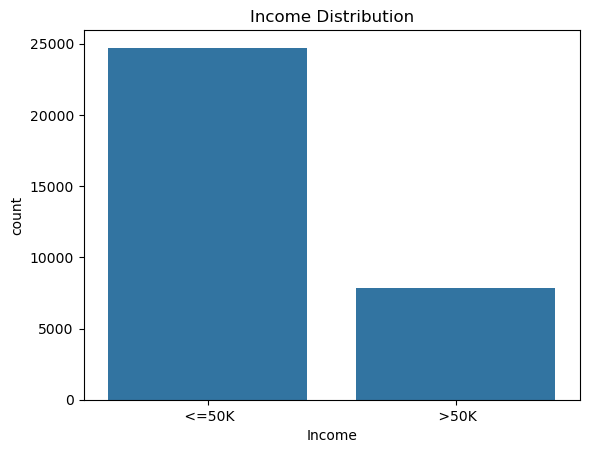

In [17]:
sns.countplot(x='Income', data=df)
plt.title("Income Distribution")
plt.show()


In [18]:
df.describe()

,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
X = df.drop('Income', axis=1)
y = df['Income']

In [20]:
# Income ni oldin olib tashlash
# y = df['Income']
# df = df.drop('Income', axis=1)  # Bu yerda drop qil!

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.columns:
    if X[col].nunique()<=5 and X[col].dtype=='object':
        dummies=pd.get_dummies(X[col], prefix=col, dtype='int')
        X=pd.concat([X.drop(col, axis=1), dummies], axis=1)
    else:
        X[col]=le.fit_transform(df[col])

In [22]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [24]:
#y_le = LabelEncoder()
#y_train = y_le.fit_transform(y_train)
#X_test = y_le.transform(y_test)


In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report

score = accuracy_score(y_test, y_pred)
print("Accuracy:", score)


Accuracy: 0.8207923832923832


In [27]:
model

GaussianNB()

## Randomized SearchCV

In [28]:
params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

In [29]:
type(params)

dict

In [30]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42,
)

In [31]:
random_search

RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': [1e-09, 1e-08, 1e-07,
                                                          1e-06]},
                   random_state=42)

In [32]:

random_search.fit(X_train, y_train)



c:\Users\Maftuna\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': [1e-09, 1e-08, 1e-07,
                                                          1e-06]},
                   random_state=42)

In [33]:
print("Best parameters: ", random_search.best_params_)

Best parameters:  {'var_smoothing': 1e-09}


In [34]:
best_model = random_search.best_estimator_

In [35]:
best_model

GaussianNB()

In [36]:
y_pred = best_model.predict(X_test)

In [37]:
score = accuracy_score(y_test, y_pred)
print(score)

0.8207923832923832


### Gradient Boosting models (scikit learn)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=0.2, random_state=42 )
gbc 

GradientBoostingClassifier(learning_rate=0.2, n_estimators=20, random_state=42)

In [39]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=20, random_state=42)

In [40]:
y_pred = gbc.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.8573402948402948


## Shap Value

In [41]:
import shap
shap.initjs # intractive visualization 
import matplotlib.pyplot as plt 



In [42]:
explainer_gbc = shap.Explainer(gbc)
shap_values = explainer_gbc.shap_values(X_test)

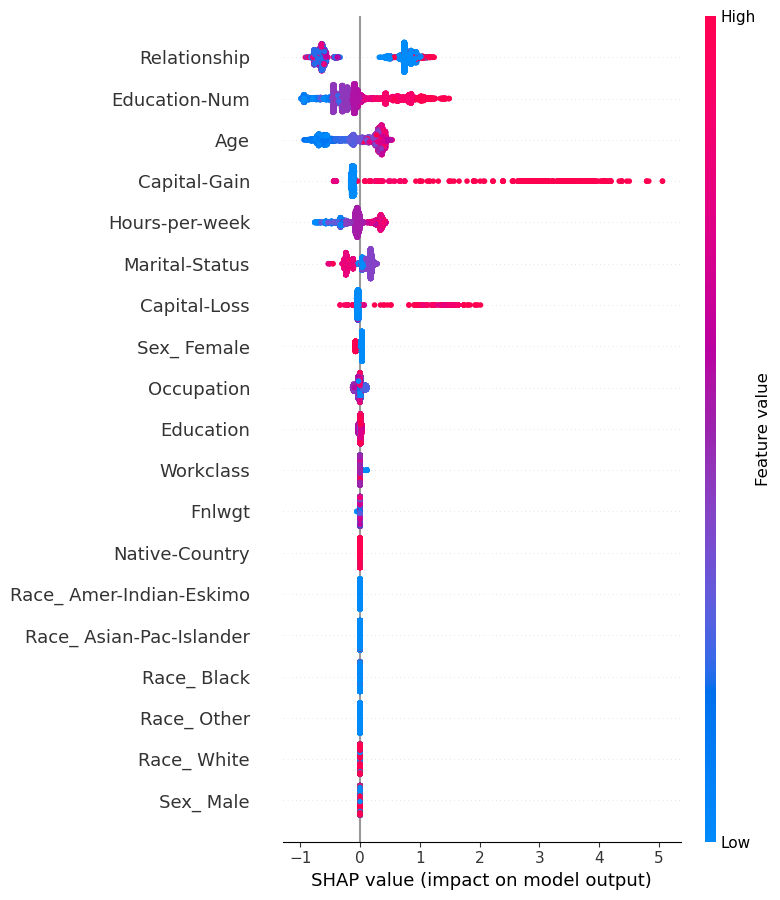

In [43]:
shap.summary_plot(shap_values, X_test)

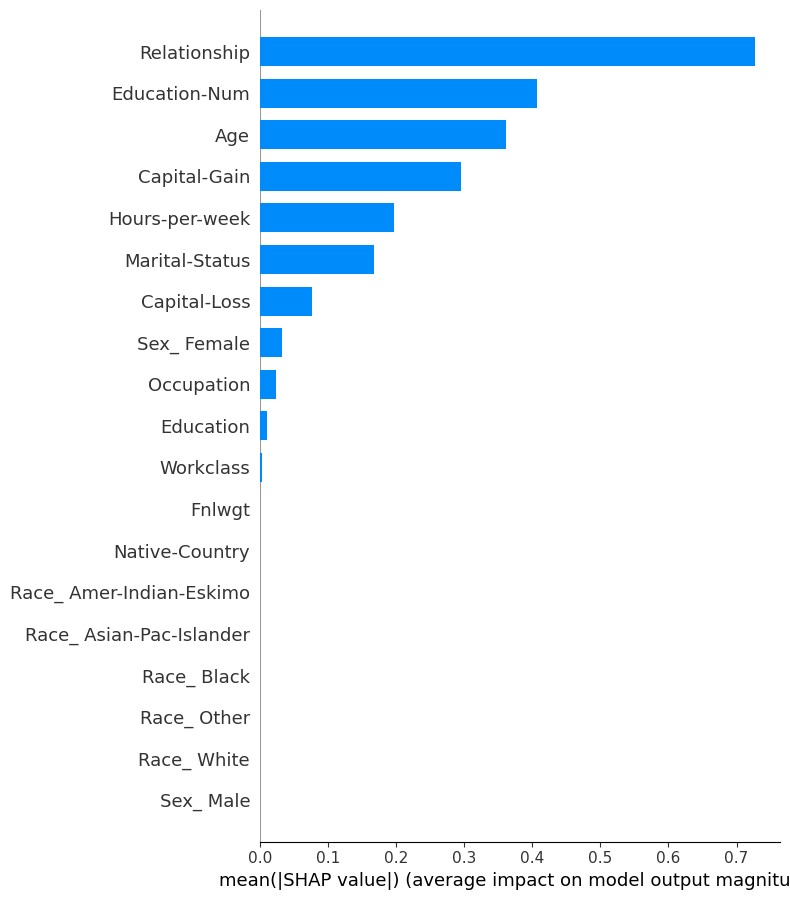

In [44]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

PermutationExplainer explainer: 6513it [01:51, 55.03it/s]                          
C:\Users\Maftuna\AppData\Local\Temp\ipykernel_12284\1138987152.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)
c:\Users\Maftuna\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
c:\Users\Maftuna\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:746: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new beha

<Figure size 640x480 with 0 Axes>

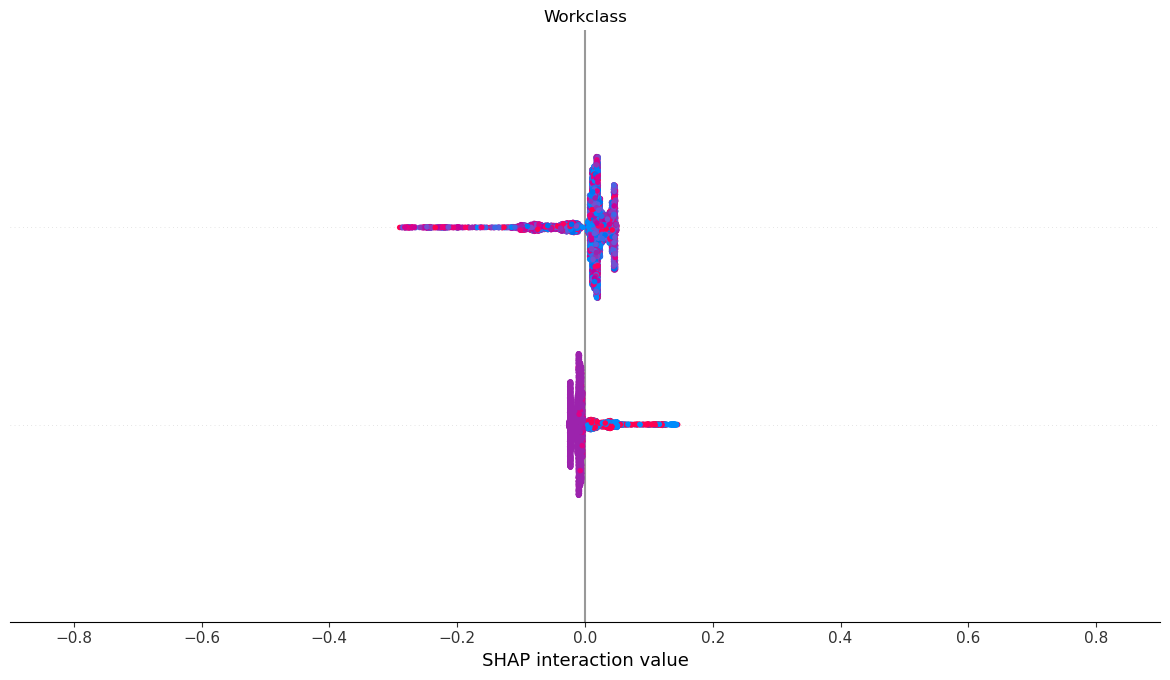

In [45]:


# Diqqat: predict_proba bilan!
explainer = shap.Explainer(best_model.predict_proba, X_test)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


C:\Users\Maftuna\AppData\Local\Temp\ipykernel_12284\3786880456.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type='bar')
c:\Users\Maftuna\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
c:\Users\Maftuna\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:746: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 640x480 with 0 Axes>

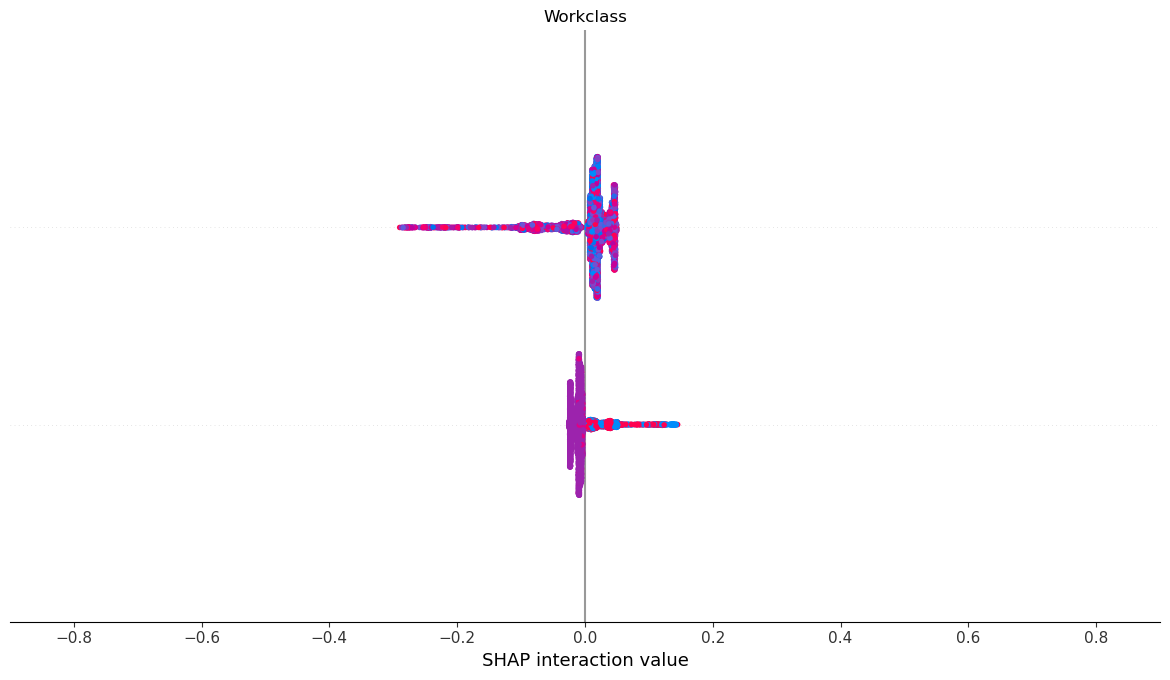

In [46]:
shap.summary_plot(shap_values, X_test, plot_type='bar')